# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | afaahiti
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | lihue
Processing Record 4 of Set 1 | alice springs
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | tweed heads
Processing Record 7 of Set 1 | bulawayo
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | prymors'k
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | mahina
Processing Record 12 of Set 1 | fale old settlement
Processing Record 13 of Set 1 | chibuto
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | siniscola
Processing Record 17 of Set 1 | akrehamn
Processing Record 18 of Set 1 | yuzhno-kurilsk
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | guajara mirim
Processing Record 22 of Set 1 | takoradi


Processing Record 38 of Set 4 | upington
Processing Record 39 of Set 4 | rehoboth
Processing Record 40 of Set 4 | berezovyy
Processing Record 41 of Set 4 | vila velha
Processing Record 42 of Set 4 | malango
Processing Record 43 of Set 4 | najaf
Processing Record 44 of Set 4 | teknaf
Processing Record 45 of Set 4 | cloverdale
Processing Record 46 of Set 4 | sao vicente
Processing Record 47 of Set 4 | saudarkrokur
Processing Record 48 of Set 4 | hede
Processing Record 49 of Set 4 | arquitecto tomas romero pereira
Processing Record 0 of Set 5 | tazacorte
Processing Record 1 of Set 5 | al hazm
Processing Record 2 of Set 5 | antofagasta
Processing Record 3 of Set 5 | tralee
Processing Record 4 of Set 5 | sosnovo-ozerskoye
Processing Record 5 of Set 5 | seven pagodas
Processing Record 6 of Set 5 | huinca renanco
Processing Record 7 of Set 5 | naryn
Processing Record 8 of Set 5 | ust'-ilimsk
Processing Record 9 of Set 5 | yorkton
Processing Record 10 of Set 5 | hayma'
City not found. Skipping

Processing Record 31 of Set 8 | prince albert
Processing Record 32 of Set 8 | kandahar
Processing Record 33 of Set 8 | campos belos
Processing Record 34 of Set 8 | kilimatinde
Processing Record 35 of Set 8 | rikaze
Processing Record 36 of Set 8 | holualoa
Processing Record 37 of Set 8 | imbituba
Processing Record 38 of Set 8 | al bardiyah
Processing Record 39 of Set 8 | hlybokaye
Processing Record 40 of Set 8 | tongren
Processing Record 41 of Set 8 | sragen
Processing Record 42 of Set 8 | luderitz
Processing Record 43 of Set 8 | mossel bay
Processing Record 44 of Set 8 | chibougamau
Processing Record 45 of Set 8 | dudinka
Processing Record 46 of Set 8 | mejit
Processing Record 47 of Set 8 | lekki
City not found. Skipping...
Processing Record 48 of Set 8 | keelakarai
Processing Record 49 of Set 8 | filey
Processing Record 0 of Set 9 | puerto san carlos
City not found. Skipping...
Processing Record 1 of Set 9 | taslicay
Processing Record 2 of Set 9 | fortuna
Processing Record 3 of Set 9 

Processing Record 21 of Set 12 | pampierstad
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,afaahiti,-17.7500,-149.2833,84.07,83,85,24.09,PF,1702239097
1,puerto natales,-51.7236,-72.4875,54.05,58,75,13.80,CL,1702239098
2,lihue,21.9789,-159.3672,79.84,78,75,9.22,US,1702239098
3,alice springs,-23.7000,133.8833,51.35,87,1,8.05,AU,1702239098
4,puerto ayora,-0.7393,-90.3518,84.16,76,31,9.69,EC,1702239067


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,afaahiti,-17.7500,-149.2833,84.07,83,85,24.09,PF,1702239097
1,puerto natales,-51.7236,-72.4875,54.05,58,75,13.80,CL,1702239098
2,lihue,21.9789,-159.3672,79.84,78,75,9.22,US,1702239098
3,alice springs,-23.7000,133.8833,51.35,87,1,8.05,AU,1702239098
4,puerto ayora,-0.7393,-90.3518,84.16,76,31,9.69,EC,1702239067


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

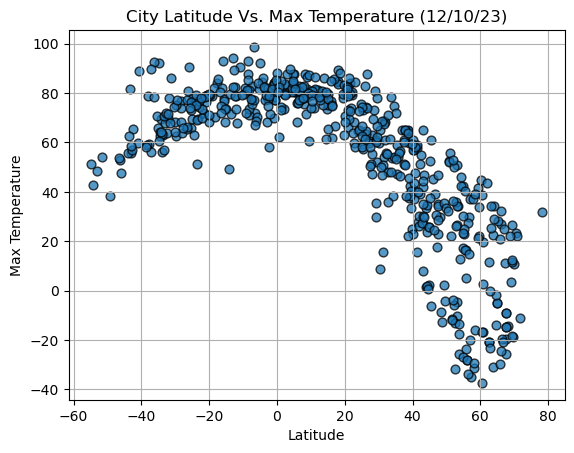

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",s=40,alpha=.75, edgecolors="black")



# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

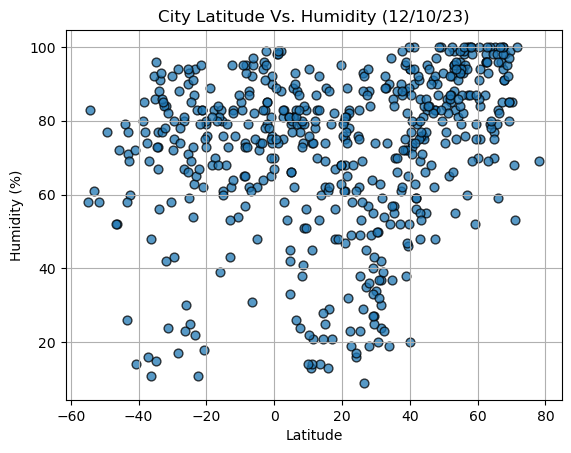

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",s=40,alpha=.75, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

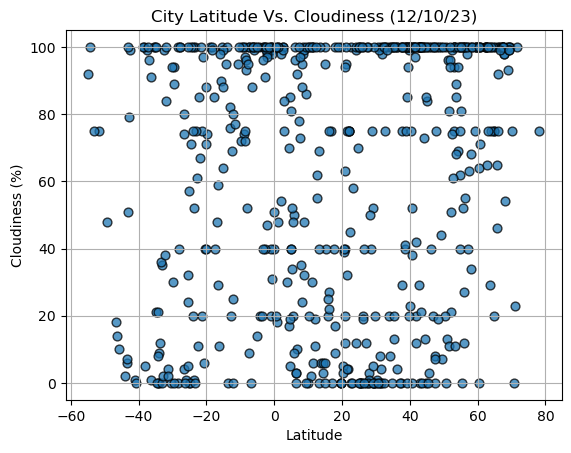

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",s=40,alpha=.75, edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

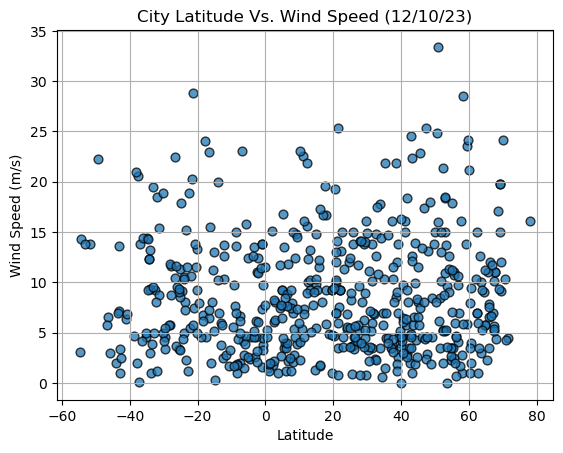

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",s=40,alpha=.75, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Plot scatter plot
    plt.scatter(x_values, y_values, marker="o", s=40, alpha=.45, edgecolors="blue")

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # Calculate text position based on data range
    text_position = (x_values.min() + (x_values.max() - x_values.min()) * 0.5,
                     y_values.min() + (y_values.max() - y_values.min()) * 0.9)

    # Annotate the regression equation
    plt.annotate(line_eq, text_position, fontsize=15, color="r", weight="bold")

    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Print r square value
    print(f"The correlation coefficient (r) is: {rvalue}")
    print(f"The p-value is: {pvalue}")

    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lihue,21.9789,-159.3672,79.84,78,75,9.22,US,1702239098
7,iqaluit,63.7506,-68.5145,22.69,79,100,10.00,CA,1702239098
8,prymors'k,46.7348,36.3443,39.13,91,100,17.40,UA,1702239098
15,siniscola,40.5719,9.6922,56.75,74,38,9.69,IT,1702239099
16,akrehamn,59.2667,5.1833,41.41,52,75,13.80,NO,1702239099


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,afaahiti,-17.7500,-149.2833,84.07,83,85,24.09,PF,1702239097
1,puerto natales,-51.7236,-72.4875,54.05,58,75,13.80,CL,1702239098
3,alice springs,-23.7000,133.8833,51.35,87,1,8.05,AU,1702239098
4,puerto ayora,-0.7393,-90.3518,84.16,76,31,9.69,EC,1702239067
5,tweed heads,-28.1817,153.5470,77.00,88,40,5.75,AU,1702239098


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient (r) is: -0.8380501984385227
The p-value is: 3.085319362086533e-101


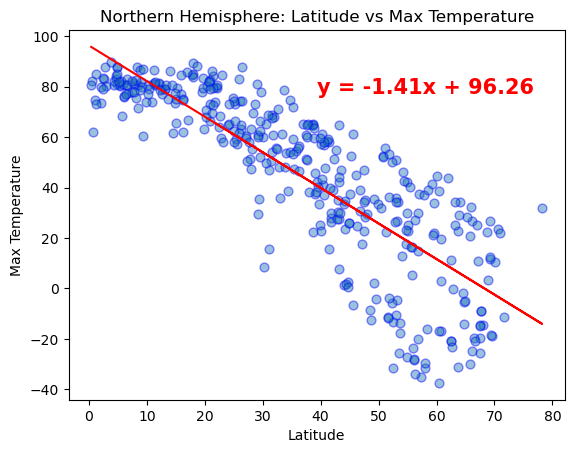

In [31]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    "Latitude",
    "Max Temperature",
    "Northern Hemisphere: Latitude vs Max Temperature"
)

The correlation coefficient (r) is: 0.5935880631130634
The p-value is: 1.1688580064852532e-17


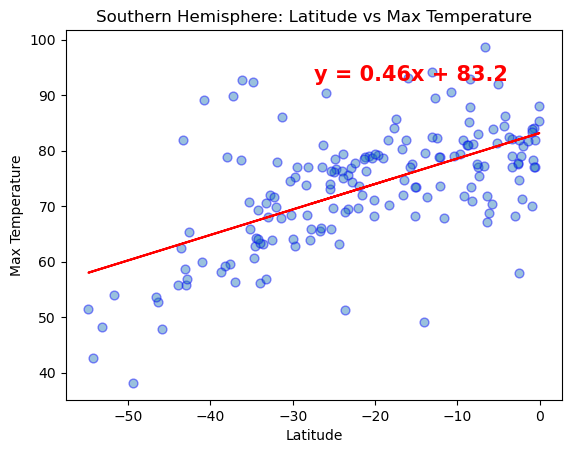

In [35]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Max Temp'],
    "Latitude",
    "Max Temperature",
    "Southern Hemisphere: Latitude vs Max Temperature"
)

**Discussion about the linear relationship:** 
The linear regression illustrates that the temperature of the Northern Hemisphere decreases as the latitude increases and gets further from the equature (0). Meanwhile for the Southern Hemisphere, as the latitude gets closer to the equator, the temperature increases. The regression line and tighlty clustered scatter plots show that there is a strong correlation between temperature and latitude. 

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient (r) is: 0.39029628505111935
The p-value is: 3.0659656714750137e-15


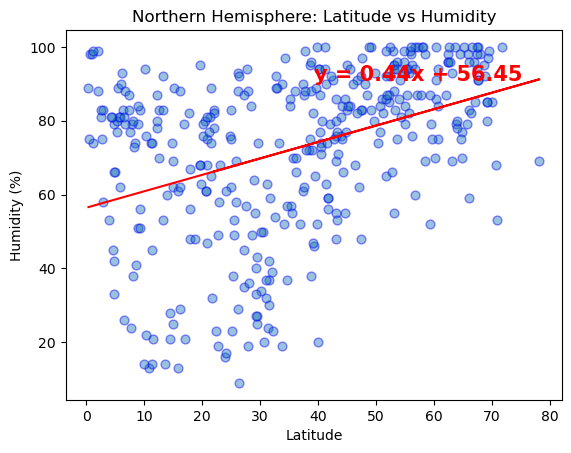

In [17]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    "Latitude",
    "Humidity (%)",
    "Northern Hemisphere: Latitude vs Humidity"
)

The correlation coefficient (r) is: 0.241645027427154
The p-value is: 0.001452230367795471


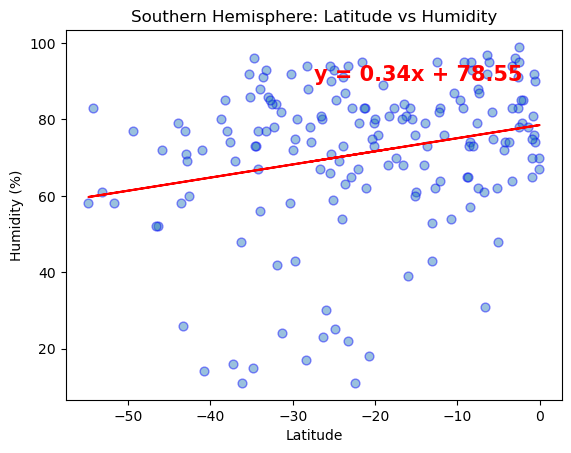

In [25]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    "Latitude",
    "Humidity (%)",
    "Southern Hemisphere: Latitude vs Humidity"
)

**Discussion about the linear relationship:** 
Based on the regression line and loosely clustered scatter plot, for the Southern and Northern Hempisheres, there does not appear to be a strong relationship between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient (r) is: 0.2745499793252348
The p-value is: 5.572764286092232e-08


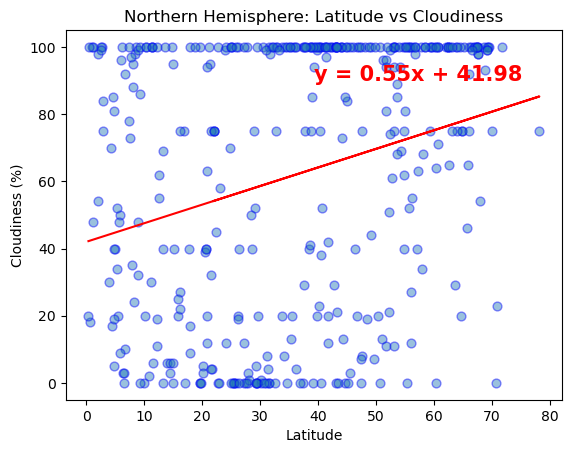

In [33]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    "Latitude",
    "Cloudiness (%)",
    "Northern Hemisphere: Latitude vs Cloudiness"
)

The correlation coefficient (r) is: 0.2759039588947902
The p-value is: 0.00025959231941129207


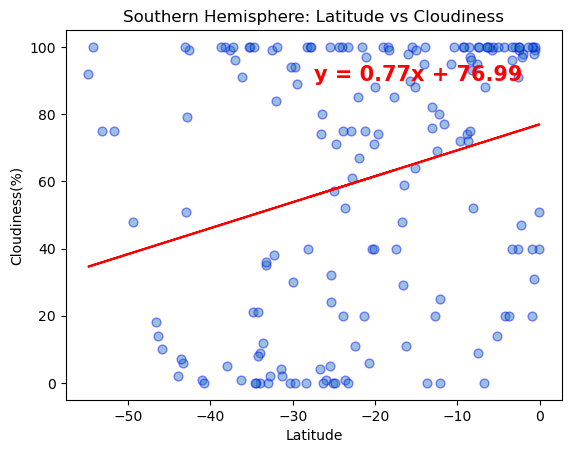

In [34]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    "Latitude",
    "Cloudiness(%)",
    "Southern Hemisphere: Latitude vs Cloudiness"
)

**Discussion about the linear relationship:** There is no relationship between cloudiness and latitude based on the regression analyses for the Southern and Northern Hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient (r) is: 0.09347722043536277
The p-value is: 0.06909805294156551


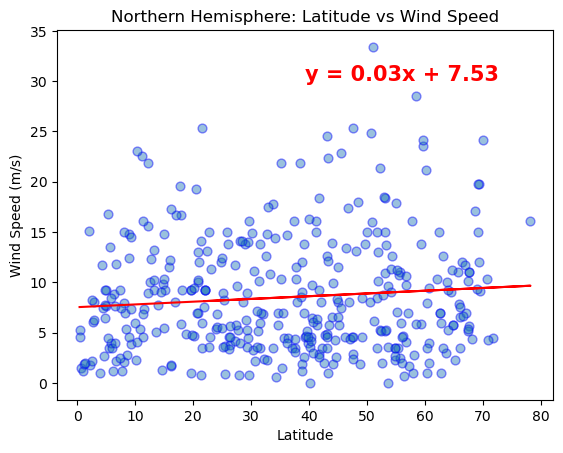

In [21]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    "Latitude",
    "Wind Speed (m/s)",
    "Northern Hemisphere: Latitude vs Wind Speed"
)

The correlation coefficient (r) is: -0.11723619155369737
The p-value is: 0.1267389754848916


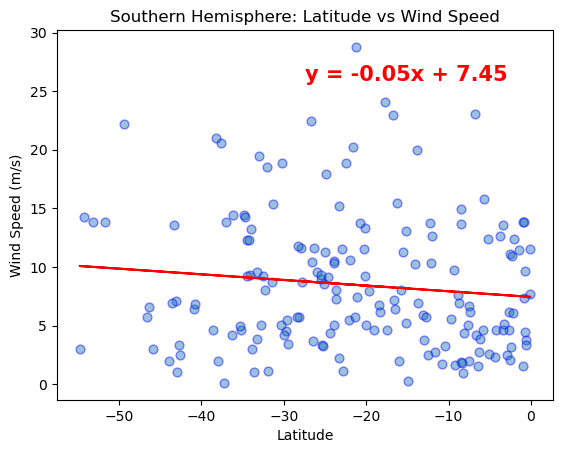

In [22]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    "Latitude",
    "Wind Speed (m/s)",
    "Southern Hemisphere: Latitude vs Wind Speed"
)

**Discussion about the linear relationship:** While windspeed and latitude don't appear to be strongly related, we can see that for both the Northern and Southern hemispheres the wind speed is typically under 25 (m/s). 